## Установка библиотек

In [74]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import ttest_ind, f_oneway


In [75]:
data = pd.read_csv('data/streaming_viewership_data.csv')

In [76]:
data.shape

(6214, 16)

In [77]:
data.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

Разобьем выборку на несколько сегментов:

1. Устройство просмотра видео
2. Пол пользователя
3. Уровень подписки

Для каждого разделения проведем оценку:

1. Продолжительность видео, просмотренное пользователем
2. Возраст пользователя, просмотревший видео
3. Количество откликов

In [79]:
df = data.sample(frac=1, random_state=42)

## Пункт 2

### Пол пользователя

In [85]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

#### Возраст пользователей

<Axes: xlabel='Age', ylabel='Density'>

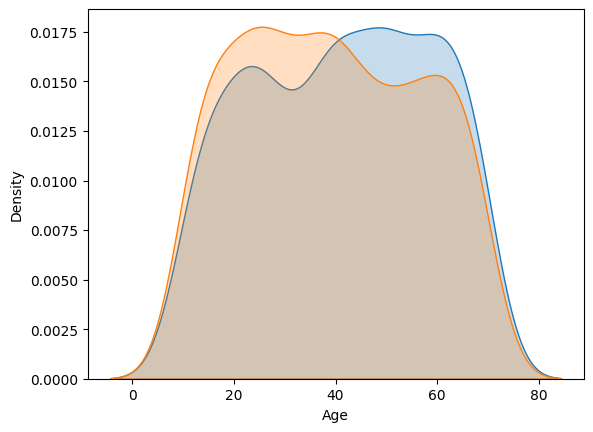

In [86]:
sns.kdeplot(male_df['Age'], fill=True)
sns.kdeplot(female_df['Age'], fill=True)

Видно, что распределния не нормальные, поэтому для сравнения средних проведем тест Манна-Уитни

In [87]:
statistic, p_value = st.mannwhitneyu(male_df['Age'], female_df['Age'])

alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между выборками")
else:
    print("Нет статистически значимых различий между выборками")

Есть статистически значимые различия между выборками


#### Продолжительность видео, просмотренное пользователем

<Axes: xlabel='Duration_Watched (minutes)', ylabel='Density'>

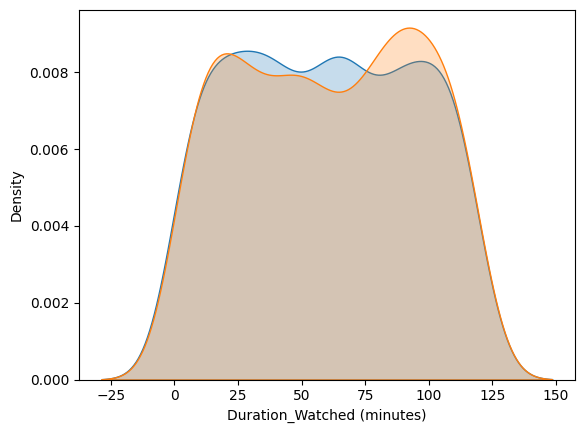

In [88]:
sns.kdeplot(male_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(female_df['Duration_Watched (minutes)'], fill=True)

In [91]:
statistic, p_value = st.mannwhitneyu(male_df['Duration_Watched (minutes)'], female_df['Duration_Watched (minutes)'])

alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между выборками")
else:
    print("Нет статистически значимых различий между выборками")

Нет статистически значимых различий между выборками


#### Количество откликов пользователей

<Axes: xlabel='Interaction_Events', ylabel='Density'>

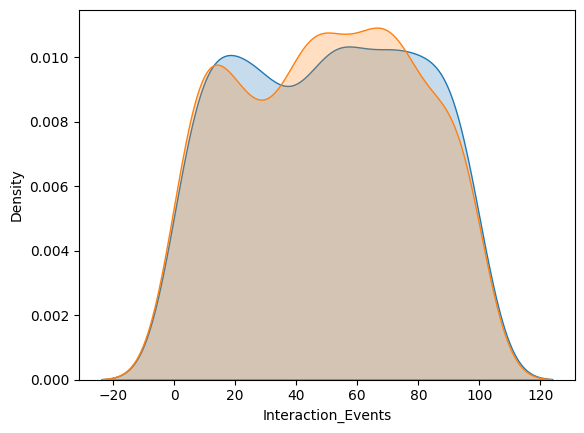

In [95]:
sns.kdeplot(male_df['Interaction_Events'],fill=True)
sns.kdeplot(female_df['Interaction_Events'],fill=True)


In [96]:
statistic, p_value = st.mannwhitneyu(male_df['Interaction_Events'], female_df['Interaction_Events'])

alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между выборками")
else:
    print("Нет статистически значимых различий между выборками")

Нет статистически значимых различий между выборками


### Уровень подписки

In [98]:
df['Subscription_Status'].unique()

array(['Premium', 'Free'], dtype=object)

In [99]:
premium_df, free_df = (df[df['Subscription_Status'] == 'Premium'],
                       df[df['Subscription_Status'] == 'Free'])

#### Продолжительность видео

<Axes: xlabel='Duration_Watched (minutes)', ylabel='Density'>

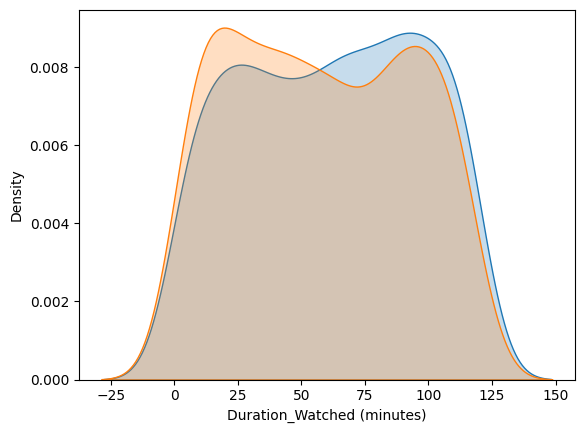

In [100]:
sns.kdeplot(premium_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(free_df['Duration_Watched (minutes)'], fill=True)

In [101]:
statistic, p_value = st.mannwhitneyu(premium_df['Duration_Watched (minutes)'], free_df['Duration_Watched (minutes)'])

alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между выборками")
else:
    print("Нет статистически значимых различий между выборками")

Есть статистически значимые различия между выборками


#### Возраст пользователей

<Axes: xlabel='Age', ylabel='Density'>

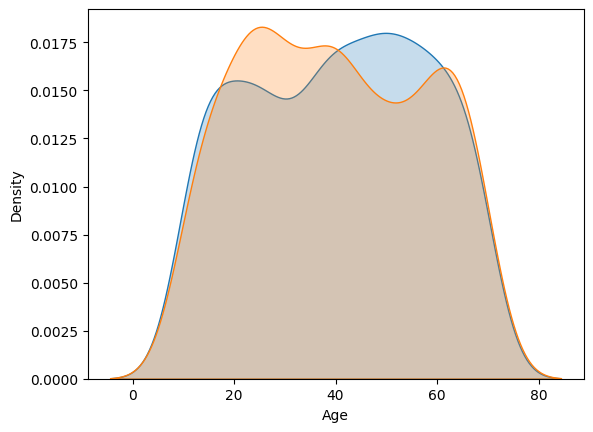

In [102]:
sns.kdeplot(premium_df['Age'], fill=True)
sns.kdeplot(free_df['Age'], fill=True)

In [103]:
statistic, p_value = st.mannwhitneyu(premium_df['Age'], free_df['Age'])

alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между выборками")
else:
    print("Нет статистически значимых различий между выборками")

Нет статистически значимых различий между выборками


#### Количество откликов пользователей

<Axes: xlabel='Interaction_Events', ylabel='Density'>

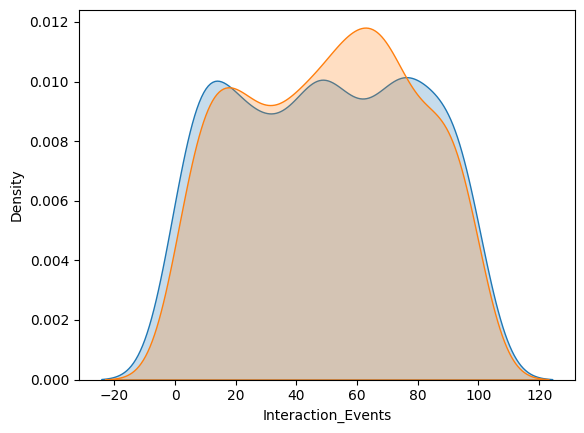

In [104]:
sns.kdeplot(premium_df['Interaction_Events'], fill=True)
sns.kdeplot(free_df['Interaction_Events'], fill=True)

In [105]:
statistic, p_value = st.mannwhitneyu(premium_df['Interaction_Events'], free_df['Interaction_Events'])

alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между выборками")
else:
    print("Нет статистически значимых различий между выборками")

Нет статистически значимых различий между выборками


## Пункт 3

### Устройство просмотра видео

In [ ]:
df['Device_Type'].unique()

array(['Tablet', 'Laptop', 'Smart TV', 'Desktop', 'Smartphone'],
      dtype=object)

In [ ]:
smartphone_df, desktop_df, tablet_df, laptop_df, smart_df = (df[df['Device_Type'] == 'Smartphone'],
                             df[df['Device_Type'] == 'Desktop'],
                             df[df['Device_Type'] == 'Tablet'],
                             df[df['Device_Type'] == 'Laptop'],
                             df[df['Device_Type'] == 'Smart TV'])
other_df = [desktop_df, tablet_df, laptop_df, smart_df]

#### Продолжительность видео, просмотренное пользователем

<Axes: xlabel='Duration_Watched (minutes)', ylabel='Density'>

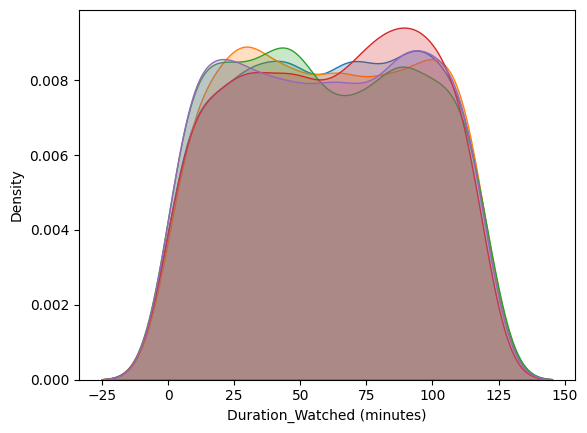

In [ ]:
sns.kdeplot(smartphone_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(desktop_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(tablet_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(laptop_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(smart_df['Duration_Watched (minutes)'], fill=True)

В данном пункте проведем тесты по сравнению выборки, которая использует smartphone от остальных выборок

In [ ]:
# Попарные сравнения через тест Стьюдента
print("Сравнения с использованием теста Стьюдента:")
for df in other_df:
    stat, p_val = ttest_ind(smartphone_df['Duration_Watched (minutes)'], df['Duration_Watched (minutes)'])
    print(f"p-value = {p_val}")

segments = [smartphone_df['Duration_Watched (minutes)'], desktop_df['Duration_Watched (minutes)'], tablet_df['Duration_Watched (minutes)'], laptop_df['Duration_Watched (minutes)'], smart_df['Duration_Watched (minutes)']]   
print("\nСравнения с использованием теста Фишера (ANOVA):")
stat, p_val = f_oneway(*segments)
print(f"p-value = {p_val}")

Сравнения с использованием теста Стьюдента:
p-value = 0.7500097597613312
p-value = 0.24589421098628503
p-value = 0.9943679058627881
p-value = 0.4356579423773087

Сравнения с использованием теста Фишера (ANOVA):
p-value = 0.721077471717003


## Пункт 4

Duration_Watched (minutes)
Точный доверительный интервал для среднего: (57.48171114159309, 61.408197464548216)


100%|██████████| 10000/10000 [00:00<00:00, 14539.77it/s]


[56.76 62.11]

Age
Точный доверительный интервал для среднего: (39.21494424251629, 43.14143056547142)


100%|██████████| 10000/10000 [00:00<00:00, 15198.26it/s]


[39.82 42.49]

Interaction_Events
Точный доверительный интервал для среднего: (48.23952181548096, 52.16600813843609)


100%|██████████| 10000/10000 [00:00<00:00, 15849.06it/s]


[47.96 52.42]



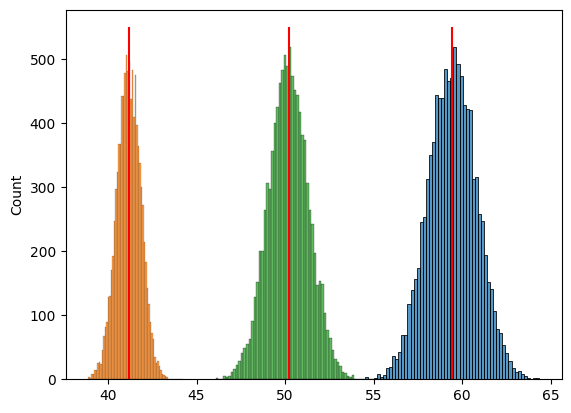

In [120]:
features = ['Duration_Watched (minutes)', 'Age', 'Interaction_Events']
for el in features: 
    print(el)
    data = [1, 2, 3, 4, 5]
    confidence_level = 0.95
    mean = np.mean(male_df[el])
    std_dev = np.std(data, ddof=1)
    sample_size = len(data)
    margin_of_error = st.t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / np.sqrt(sample_size))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    print(f"Точный доверительный интервал для среднего: ({lower_bound}, {upper_bound})")

    means_lst = []
    for _ in tqdm(range(10000)):
        tmp = np.random.choice(male_df[el], size=len(male_df[el]), replace=True)
        means_lst.append(tmp.mean())

    sns.histplot(means_lst)
    plt.vlines(mean, ymin=0, ymax=550, colors='red')

    print(np.percentile(means_lst,q=[2.5, 97.5]).round(2))
    print()


#### Как видим, что эфронов доверительный интревал, в основном, шире точного

## Пункт 5

Во втором пункте можно было использовать другие критерии оценивания распределения данных, например критерий Пирсона. Также можно было проверить данные на нормальность с помощью QQ-plot или тест Шапиро-Уилка